Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly as pt
import os

In [2]:
df_udemy = pd.read_csv('/content/udemy_online_education_courses_dataset.csv')
print('The columns of the Udemy Course data frame are :-  ',df_udemy.columns)

The columns of the Udemy Course data frame are :-   Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')


In [3]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
df_udemy.head(20)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.500000,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.000000,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.500000,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.000000,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.000000,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.000000,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.000000,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.500000,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.500000,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.000000,2017-04-18T18:13:32Z,Business Finance


Converting csv to sql table

In [5]:
# import sqlalchemy and create a sqlite engine
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'playstore' to the sqlite engine
df_udemy.to_sql("Udemy", con =engine)

3678

In [6]:
query1='''

Select * from Udemy
limit 20


''';
df_sql_udemy = pd.read_sql(query1,con=engine)
df_sql_udemy.head(20)

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.500000,2017-01-18T20:58:58Z,Business Finance
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.000000,2017-03-09T16:34:20Z,Business Finance
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.500000,2016-12-19T19:26:30Z,Business Finance
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.000000,2017-05-30T20:07:24Z,Business Finance
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.000000,2016-12-13T14:57:18Z,Business Finance
5,5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,1,150,9221,138,25,All Levels,3.000000,2014-05-02T15:13:30Z,Business Finance
6,6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,1,65,1540,178,26,Beginner Level,1.000000,2016-02-21T18:23:12Z,Business Finance
7,7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,1,95,2917,148,23,All Levels,2.500000,2015-01-30T22:13:03Z,Business Finance
8,8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,1,195,5172,34,38,Expert Level,2.500000,2015-05-28T00:14:03Z,Business Finance
9,9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,1,200,827,14,15,All Levels,1.000000,2017-04-18T18:13:32Z,Business Finance


In [7]:
query2='''

Select distinct subject from Udemy
limit 20


''';
df_course_subject = pd.read_sql(query2,con=engine)
df_course_subject.head(20)

,subject
0,Business Finance
1,Graphic Design
2,Musical Instruments
3,Web Development


Udemy courses varies by 4 fields.

In [8]:
query3='''

Select course_id, course_title, url	is_paid,	price,	num_subscribers,	num_reviews, subject
from Udemy
order by num_subscribers desc
limit 50
''';
df_top_subscribe = pd.read_sql(query3,con=engine)
df_top_subscribe.head(20)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,subject
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,Web Development
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,Web Development
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,Web Development
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,Web Development
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,Web Development
5,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,0,101154,1042,Musical Instruments
6,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,0,98867,6512,Web Development
7,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,30,84897,2685,Web Development
8,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,0,83737,4598,Web Development
9,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,175,79612,16976,Web Development


We can see top 20 most subscribed courses are from web development so this is trending among world wide learners. And the most subscribed course is Learn HTML5 Programming From Scratch

In [9]:
query4='''

Select num_subscribers, subject
from Udemy
group by subject
order by num_subscribers desc

''';
df_top_course = pd.read_sql(query4,con=engine)
df_top_course.head()

,num_subscribers,subject
0,43285,Web Development
1,4529,Musical Instruments
2,2252,Graphic Design
3,2147,Business Finance


Surprisingly 4529 numbers of subscriber took courses in Musical Instruments which is more than courses in Graphic design

In [10]:
query5='''

Select price,	num_subscribers
from Udemy
group by price
order by num_subscribers desc
limit 50
''';
df_subscribe_price = pd.read_sql(query5,con=engine)
df_subscribe_price.head(50)

,price,num_subscribers
0,180,10100
1,155,9445
2,150,9221
3,60,8314
4,105,8121
5,185,7941
6,115,7489
7,50,5354
8,195,5172
9,20,4919


Though it was assumed free courses will have highest subscriber number it is found that course with price $180 has most number of subscribers

Separating publish year from time published_timestamp

In [11]:
query6='''

Select course_id, course_title, url	is_paid,	price,	num_subscribers,	num_reviews, subject,
substr(published_timestamp,1,4) as publish_year
from Udemy
order by num_subscribers desc

''';
df_udemy2 = pd.read_sql(query6,con=engine)
df_udemy2.head(50)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,subject,publish_year
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,Web Development,2013
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,Web Development,2013
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,Web Development,2015
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,Web Development,2014
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,Web Development,2016
5,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,0,101154,1042,Musical Instruments,2012
6,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,0,98867,6512,Web Development,2015
7,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,30,84897,2685,Web Development,2013
8,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,0,83737,4598,Web Development,2014
9,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,175,79612,16976,Web Development,2015


The top subscribed course was published on year 2013

We will use udemy2 later on

Lets see what publish years we have so far

In [12]:
query7='''

Select distinct
substr(published_timestamp,1,4) as publish_year
from Udemy


''';
df_year = pd.read_sql(query7,con=engine)
df_year.head(50)

,publish_year
0,2017
1,2016
2,2014
3,2015
4,2013
5,2012
6,2011


We have courses published over 7 years

Lets find among most latest courses which course is most subscribed

In [13]:
query8='''

Select course_id, course_title, url	is_paid,	price,	num_subscribers,	num_reviews, subject,
substr(published_timestamp,1,4) as publish_year
from Udemy
where publish_year = '2017'
order by num_subscribers desc

''';
df_2017 = pd.read_sql(query8,con=engine)
df_2017.head(50)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,subject,publish_year
0,874012,The Ultimate Drawing Course - Beginner to Adva...,https://www.udemy.com/the-ultimate-drawing-cou...,150,26742,2379,Graphic Design,2017
1,1107524,The Complete NodeJS Course: Build a Full Busin...,https://www.udemy.com/learn-nodejs-by-building...,195,17784,260,Web Development,2017
2,1078522,React JS and Redux - Mastering Web Apps,https://www.udemy.com/react-js-and-redux-maste...,60,16829,820,Web Development,2017
3,1171966,The Complete PHP MySQL Professional Course wit...,https://www.udemy.com/the-complete-php-mysql-p...,200,16158,159,Web Development,2017
4,1146014,Learn JavaScript for beginners,https://www.udemy.com/learn-javascript-course/,200,15276,167,Web Development,2017
5,1165096,Vue JS - Mastering Web Apps,https://www.udemy.com/vue-web-apps/,80,13457,215,Web Development,2017
6,1049092,React JS - Build real world JS apps & deploy o...,https://www.udemy.com/reactjs-for-beginners-bu...,175,12815,262,Web Development,2017
7,1247828,Angular 4 (2+) Crash Course for Beginners,https://www.udemy.com/angular-crash-course-for...,120,12366,506,Web Development,2017
8,1120554,Canva Graphics Design Essential Training For E...,https://www.udemy.com/canva-graphics-design-es...,200,12340,124,Graphic Design,2017
9,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,200,11832,1883,Web Development,2017


in 2017, 26742 people subscribed to a graphic design course named The Ultimate Drawing Course - Beginner to Adva... followed by a web development course

In [14]:
query9='''

Select num_subscribers, num_reviews, level
from Udemy
group by level
order by num_subscribers desc

''';
df_top_level = pd.read_sql(query9,con=engine)
df_top_level.head()

,num_subscribers,num_reviews,level
0,5172,34,Expert Level
1,2174,74,Intermediate Level
2,2147,23,All Levels
3,1540,178,Beginner Level


In [15]:
query10='''

Select count(distinct(course_id)), level
from Udemy
group by level
order by count(distinct(course_id)) desc


''';
df3 = pd.read_sql(query10,con=engine)
df3.head()

,count(distinct(course_id)),level
0,1925,All Levels
1,1268,Beginner Level
2,421,Intermediate Level
3,58,Expert Level


In [16]:
query11='''

Select num_subscribers, num_reviews, content_duration
from Udemy
group by content_duration
order by num_subscribers desc

''';
df_course_duration = pd.read_sql(query11,con=engine)
df_course_duration.head(50)

,num_subscribers,num_reviews,content_duration
0,121584,27445,43.000000
1,73783,19649,22.000000
2,69186,2408,27.500000
3,50815,15117,26.500000
4,37141,1813,51.000000
5,32935,2713,34.000000
6,28880,4316,30.500000
7,24861,423,22.500000
8,22257,2697,7.500000
9,20195,1113,16.000000


In [17]:
query12='''
Select course_id, course_title, url	is_paid,	price,	num_subscribers,	num_reviews, subject, level, content_duration,
    substr(published_timestamp,1,4) as publish_year,
    substr(published_timestamp,6,2) as publish_month
    from Udemy
    order by publish_year desc, publish_month asc
''';
df_udemy3 = pd.read_sql(query12,con=engine)
df_udemy3.head(50)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,subject,level,content_duration,publish_year,publish_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,23,Business Finance,All Levels,1.500000,2017,01
1,1057242,Learn How to Set Up an Incubator Hedge Fund - ...,https://www.udemy.com/hedge-fund-startup/,200,1406,71,Business Finance,Expert Level,1.500000,2017,01
2,1062092,Emini ES Futures - Advanced Non Directional Op...,https://www.udemy.com/emini-es-futures-advance...,200,1057,15,Business Finance,All Levels,1.500000,2017,01
3,1085580,"RSI, Options Trading & Technical Analysis (3 C...",https://www.udemy.com/charting-rsi-options-sto...,200,1047,9,Business Finance,All Levels,3.500000,2017,01
4,1076920,Stock Market investment: Practical Accounting,https://www.udemy.com/stock-market-investment-...,125,1120,6,Business Finance,Beginner Level,3.000000,2017,01
5,1022108,"Tax Accounting: Difficult Topic, Made Easy to ...",https://www.udemy.com/taxaccounting/,200,1033,10,Business Finance,All Levels,2.000000,2017,01
6,1030976,The Complete Financial Statement Analysis Course,https://www.udemy.com/the-complete-financial-s...,150,912,12,Business Finance,Beginner Level,3.000000,2017,01
7,1068986,How To Profit From Stock Market Volatility,https://www.udemy.com/how-to-trade-stock-marke...,0,1736,36,Business Finance,All Levels,0.600000,2017,01
8,1053272,The Financial Analyst Skills Training (FAST) c...,https://www.udemy.com/the-financial-analyst-sk...,100,589,31,Business Finance,All Levels,10.000000,2017,01
9,1079040,Leaps Options Trading System - Diagonal Leaps ...,https://www.udemy.com/leaps-options-trading-sy...,200,993,19,Business Finance,All Levels,1.000000,2017,01


In [18]:
query13='''
WITH formatted_data AS (
    SELECT
        course_id,
        course_title,
        url,
        is_paid,
        price,
        num_subscribers,
        num_reviews,
        subject,
        level,
        num_lectures,
        content_duration,
        SUBSTR(published_timestamp, 1, 4) AS publish_year,
         CASE SUBSTR(published_timestamp, 6, 2)
            WHEN '01' THEN 'January'
            WHEN '02' THEN 'February'
            WHEN '03' THEN 'March'
            WHEN '04' THEN 'April'
            WHEN '05' THEN 'May'
            WHEN '06' THEN 'June'
            WHEN '07' THEN 'July'
            WHEN '08' THEN 'August'
            WHEN '09' THEN 'September'
            WHEN '10' THEN 'October'
            WHEN '11' THEN 'November'
            WHEN '12' THEN 'December'
        END AS publish_month
    FROM Udemy
)
SELECT
    course_id,
    course_title,
    url,
    is_paid,
    price,
    num_subscribers,
    num_reviews,
    subject,
    level,
    num_lectures,
    content_duration,
    publish_year,
    publish_month
FROM formatted_data
ORDER BY publish_year DESC,
CASE publish_month
            WHEN 'January' THEN 1
            WHEN 'February' THEN 2
            WHEN 'March' THEN 3
            WHEN 'April' THEN 4
            WHEN 'May' THEN 5
            WHEN 'June' THEN 6
            WHEN 'July' THEN 7
            WHEN 'August' THEN 8
            WHEN 'September' THEN 9
            WHEN 'October' THEN 10
            WHEN 'November' THEN 11
            WHEN 'December' THEN 12
         END Asc;
''';

df_udemy4 = pd.read_sql(query13,con=engine)
df_udemy4.head(50)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,subject,level,num_lectures,content_duration,publish_year,publish_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,Business Finance,All Levels,51,1.500000,2017,January
1,1057242,Learn How to Set Up an Incubator Hedge Fund - ...,https://www.udemy.com/hedge-fund-startup/,1,200,1406,71,Business Finance,Expert Level,54,1.500000,2017,January
2,1062092,Emini ES Futures - Advanced Non Directional Op...,https://www.udemy.com/emini-es-futures-advance...,1,200,1057,15,Business Finance,All Levels,14,1.500000,2017,January
3,1085580,"RSI, Options Trading & Technical Analysis (3 C...",https://www.udemy.com/charting-rsi-options-sto...,1,200,1047,9,Business Finance,All Levels,46,3.500000,2017,January
4,1076920,Stock Market investment: Practical Accounting,https://www.udemy.com/stock-market-investment-...,1,125,1120,6,Business Finance,Beginner Level,43,3.000000,2017,January
5,1022108,"Tax Accounting: Difficult Topic, Made Easy to ...",https://www.udemy.com/taxaccounting/,1,200,1033,10,Business Finance,All Levels,29,2.000000,2017,January
6,1030976,The Complete Financial Statement Analysis Course,https://www.udemy.com/the-complete-financial-s...,1,150,912,12,Business Finance,Beginner Level,37,3.000000,2017,January
7,1068986,How To Profit From Stock Market Volatility,https://www.udemy.com/how-to-trade-stock-marke...,0,0,1736,36,Business Finance,All Levels,11,0.600000,2017,January
8,1053272,The Financial Analyst Skills Training (FAST) c...,https://www.udemy.com/the-financial-analyst-sk...,1,100,589,31,Business Finance,All Levels,138,10.000000,2017,January
9,1079040,Leaps Options Trading System - Diagonal Leaps ...,https://www.udemy.com/leaps-options-trading-sy...,1,200,993,19,Business Finance,All Levels,16,1.000000,2017,January


# **we will now use df_udemy4 for further Analysis using Python**

In [19]:
df_udemy4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3678 non-null   int64  
 1   course_title      3678 non-null   object 
 2   url               3678 non-null   object 
 3   is_paid           3678 non-null   int64  
 4   price             3678 non-null   int64  
 5   num_subscribers   3678 non-null   int64  
 6   num_reviews       3678 non-null   int64  
 7   subject           3678 non-null   object 
 8   level             3678 non-null   object 
 9   num_lectures      3678 non-null   int64  
 10  content_duration  3678 non-null   float64
 11  publish_year      3678 non-null   object 
 12  publish_month     3678 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 373.7+ KB


Changing datatypes o correct type for publish_year

In [20]:
# Convert publish_year to integer
df_udemy4['publish_year'] = df_udemy4['publish_year'].astype(int)



print(df_udemy4.dtypes)

course_id             int64
course_title         object
url                  object
is_paid               int64
price                 int64
num_subscribers       int64
num_reviews           int64
subject              object
level                object
num_lectures          int64
content_duration    float64
publish_year          int64
publish_month        object
dtype: object


In [21]:
df_udemy4.head(20)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,subject,level,num_lectures,content_duration,publish_year,publish_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,Business Finance,All Levels,51,1.5,2017,January
1,1057242,Learn How to Set Up an Incubator Hedge Fund - ...,https://www.udemy.com/hedge-fund-startup/,1,200,1406,71,Business Finance,Expert Level,54,1.5,2017,January
2,1062092,Emini ES Futures - Advanced Non Directional Op...,https://www.udemy.com/emini-es-futures-advance...,1,200,1057,15,Business Finance,All Levels,14,1.5,2017,January
3,1085580,"RSI, Options Trading & Technical Analysis (3 C...",https://www.udemy.com/charting-rsi-options-sto...,1,200,1047,9,Business Finance,All Levels,46,3.5,2017,January
4,1076920,Stock Market investment: Practical Accounting,https://www.udemy.com/stock-market-investment-...,1,125,1120,6,Business Finance,Beginner Level,43,3.0,2017,January
5,1022108,"Tax Accounting: Difficult Topic, Made Easy to ...",https://www.udemy.com/taxaccounting/,1,200,1033,10,Business Finance,All Levels,29,2.0,2017,January
6,1030976,The Complete Financial Statement Analysis Course,https://www.udemy.com/the-complete-financial-s...,1,150,912,12,Business Finance,Beginner Level,37,3.0,2017,January
7,1068986,How To Profit From Stock Market Volatility,https://www.udemy.com/how-to-trade-stock-marke...,0,0,1736,36,Business Finance,All Levels,11,0.6,2017,January
8,1053272,The Financial Analyst Skills Training (FAST) c...,https://www.udemy.com/the-financial-analyst-sk...,1,100,589,31,Business Finance,All Levels,138,10.0,2017,January
9,1079040,Leaps Options Trading System - Diagonal Leaps ...,https://www.udemy.com/leaps-options-trading-sy...,1,200,993,19,Business Finance,All Levels,16,1.0,2017,January


In [22]:
df_udemy4.describe()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,publish_year
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,0.915715,66.049483,3197.150625,156.259108,40.108755,4.094517,2015.431213
std,3.432732e+05,0.277852,61.005755,9504.117010,935.452044,50.383346,6.053840,1.185317
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.076925e+05,1.000000,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000
50%,6.879170e+05,1.000000,45.000000,911.500000,18.000000,25.000000,2.000000,2016.000000
75%,9.613555e+05,1.000000,95.000000,2546.000000,67.000000,45.750000,4.500000,2016.000000
max,1.282064e+06,1.000000,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000


We can see there is course  with 0 suscriber, lets pull up them using sql

In [23]:
query14='''

Select *
from Udemy
where num_subscribers = 0
''';
df_zero_subscribe = pd.read_sql(query14,con=engine)
df_zero_subscribe.head(50)

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,1,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
1,454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,1,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
2,455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,1,20,0,0,7,Beginner Level,2.500000,2017-07-06T21:46:30Z,Business Finance
3,456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,1,50,0,0,9,Beginner Level,2.000000,2017-07-03T21:40:32Z,Business Finance
4,457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,1,50,0,0,9,Intermediate Level,2.000000,2017-06-29T22:01:56Z,Business Finance
5,458,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,1,50,0,0,9,Intermediate Level,2.000000,2017-06-29T23:20:10Z,Business Finance
6,459,1168172,Case studies on credit appraisal for bankers,https://www.udemy.com/case-studies-on-credit-a...,1,20,0,0,15,Beginner Level,3.500000,2017-05-01T20:16:26Z,Business Finance
7,460,1233314,Building a Balanced Scorecard,https://www.udemy.com/building-balanced-scorec...,1,50,0,0,11,Intermediate Level,2.000000,2017-07-03T21:38:22Z,Business Finance
8,461,1276182,Options Trading Foundation: Your journey to co...,https://www.udemy.com/option-trading-foundatio...,1,95,0,0,5,Intermediate Level,1.000000,2017-07-05T04:41:54Z,Business Finance
9,462,1187084,Forex how traders beat the markest with little...,https://www.udemy.com/forex-how-traders-beat-t...,1,100,0,0,16,All Levels,1.000000,2017-07-06T21:16:13Z,Business Finance


In [24]:
query15='''
Select count(course_id), 	num_subscribers
    from Udemy
    where num_subscribers = 0

''';
df_15 = pd.read_sql(query15,con=engine)
df_15.head(50)

,count(course_id),num_subscribers
0,70,0


There are 70 courses with 0 subscribers

In [25]:
query16='''

Select count(course_id), subject
from Udemy
where num_subscribers = 0
group by subject
''';
df_16 = pd.read_sql(query16,con=engine)
df_16.head()

,count(course_id),subject
0,40,Business Finance
1,19,Graphic Design
2,11,Musical Instruments


Mostly business finance courses has 0 subscription

Back t Python

Lets's look for null values

In [26]:
df_udemy4.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
subject,0
level,0
num_lectures,0


Lets look for duplicates

In [27]:
df_udemy4.duplicated().sum()

6

In [28]:
# Get duplicates based on all columns
df_duplicates = df_udemy4[df_udemy4.duplicated(keep=False)]
print(df_duplicates)

      course_id                                       course_title  \
320     1157298  Introduction to Forex Trading Business For Beg...   
332     1157298  Introduction to Forex Trading Business For Beg...   
693     1084454                  CFA Level 2- Quantitative Methods   
700     1084454                  CFA Level 2- Quantitative Methods   
1176     837322  Essentials of money value: Get a financial Life !   
1186     837322  Essentials of money value: Get a financial Life !   
1842    1035638                 Understanding Financial Statements   
1850    1035638                 Understanding Financial Statements   
3053     185526                             MicroStation - Células   
3062     185526                             MicroStation - Células   
3429      28295  Learn Web Designing & HTML5/CSS3 Essentials in...   
3430      28295  Learn Web Designing & HTML5/CSS3 Essentials in...   

                                                    url  is_paid  price  \
320   https://

Drop Dulicates

In [29]:
df_udemy4.drop_duplicates(inplace=True)

In [30]:
df_udemy4.duplicated().sum()

0

Finding out total unique courses

In [31]:
print("total column", df_udemy4.shape[0])
print("total unique course:", df_udemy4['course_id'].nunique())

total column 3672
total unique course: 3672


In [32]:
df_udemy4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3672 non-null   int64  
 1   course_title      3672 non-null   object 
 2   url               3672 non-null   object 
 3   is_paid           3672 non-null   int64  
 4   price             3672 non-null   int64  
 5   num_subscribers   3672 non-null   int64  
 6   num_reviews       3672 non-null   int64  
 7   subject           3672 non-null   object 
 8   level             3672 non-null   object 
 9   num_lectures      3672 non-null   int64  
 10  content_duration  3672 non-null   float64
 11  publish_year      3672 non-null   int64  
 12  publish_month     3672 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage: 401.6+ KB


Data is almost clean from nulls, duplicates now lets find out outliers

In [33]:

numerical_columns=['num_subscribers','num_reviews','price', 'num_lectures', 'content_duration']
# Identify outliers using IQR
outliers = {}
for col in numerical_columns:
    Q1 = df_udemy4[col].quantile(0.25)  # First quartile
    Q3 = df_udemy4[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df_udemy4[(df_udemy4[col] < lower_bound) | (df_udemy4[col] > upper_bound)]

# Print outliers for each column
for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_df)
    print("\n")

Outliers in num_subscribers:
      course_id                                       course_title  \
19      1005312                             【１日でマスター！】今日からはじめる資産形成   
22       874012  The Ultimate Drawing Course - Beginner to Adva...   
45      1078522            React JS and Redux - Mastering Web Apps   
56       978852  Beginning Web development Learn the basics of ...   
70      1039062          Webpack 2: The Complete Developer's Guide   
...         ...                                                ...   
3669      30911  HTML5 APIs For JavaScript - A Course For Web D...   
3674       8325            HTML Tutorial: HTML & CSS for Beginners   
3675      11174                Become a Web Developer from Scratch   
3676      11153     Learn jQuery: An In-depth Course For Beginners   
3677      11475                   Become a Certified Web Developer   

                                                    url  is_paid  price  \
19                 https://www.udemy.com/kabucom_start/

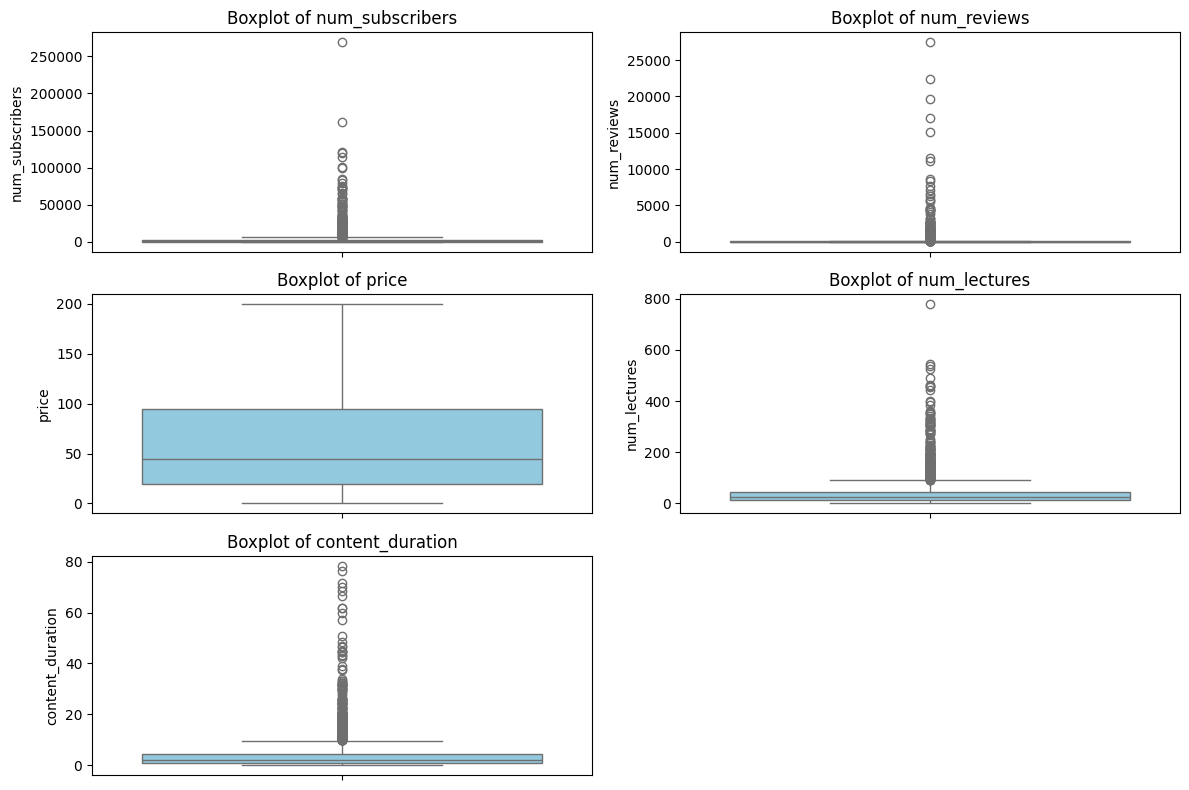

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 2, i)  # Create a grid of 2x2 for the plots
    sns.boxplot(y=df_udemy4[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


*  Most courses have a relatively small number of subscribers, with a few having very high subscriber counts, resulting in outliers.
* The box plot for reviews shows  A majority of courses have a small number of reviews, but some have an exceptionally high count, causing the outliers above the whisker.
*   The boxplot for price shows a more balanced distribution with no visible extreme outliers.
*  The boxplot for content_durtion reveals a high concentration of courses with short durations, as indicated by the dense box near the bottom of the axis. There are multiple outliers with much longer durations compared to the majority of the data.





in the num_subscribers and num_reviews columns, courses with very high values might be legitimate because they are popular. In content_duration some courses can have much lectures so in such cases, outliers should not be removed.

Let's see if courses with content duration > 15 has low number of lectures

In [35]:
query17='''

Select course_title, content_duration, num_lectures
from Udemy
where content_duration > 15
order by num_lectures desc

''';
df_17 = pd.read_sql(query17,con=engine)

df_17.head(145)

,course_title,content_duration,num_lectures
0,Back to School Web Development and Programming...,44.5,779
1,Learn to Trade The News,46.5,544
2,"Thoughtful Web Development Course: HTML, Vue.j...",25.0,536
3,Financial Management - A Complete Study,71.5,527
4,Code & Grow Rich: Earn More As An Entrepreneu...,57.0,491
...,...,...,...
140,JavaScript from Beginner to Advanced,17.0,57
141,Professional Risk Manager (PRM) Certification:...,24.0,51
142,TRADER BOT: Introdução à Linguagem MQL5,70.0,33
143,How to Draw Pinups and Sexy Women,20.0,33


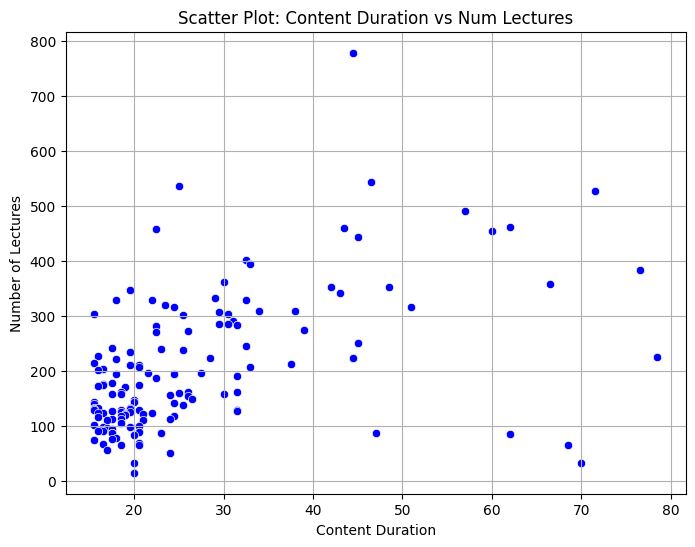

In [36]:
# Scatter plot between content_duration and num_lectures
plt.figure(figsize=(8, 6))
sns.scatterplot(x='content_duration', y='num_lectures', data=df_17, color='blue')
plt.title('Scatter Plot: Content Duration vs Num Lectures')
plt.xlabel('Content Duration')
plt.ylabel('Number of Lectures')
plt.grid(True)
plt.show()



The points are widely scattered, indicating variability in how the two variables interact.

A large cluster of data points is observed where content_duration is between 10-30 hours and num_lectures is between 50-300.
This suggests that most courses have shorter durations and fewer lectures.

Some courses have a significantly higher number of lectures ( above 500) with varying content_duration. These could be outliers or specialized courses.


Courses with long content_duration (above 60 hours) have varying numbers of lectures, from low to moderate.

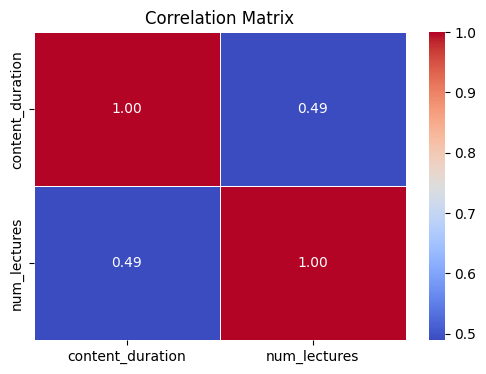

In [37]:
# Correlation matrix
correlation_matrix = df_17[['content_duration', 'num_lectures']].corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

So content_duration and num_lectures doesn't have strong correlation

its unclear which outlier in both course duration and lecture numbers are to be removed.

In [38]:
from scipy import stats

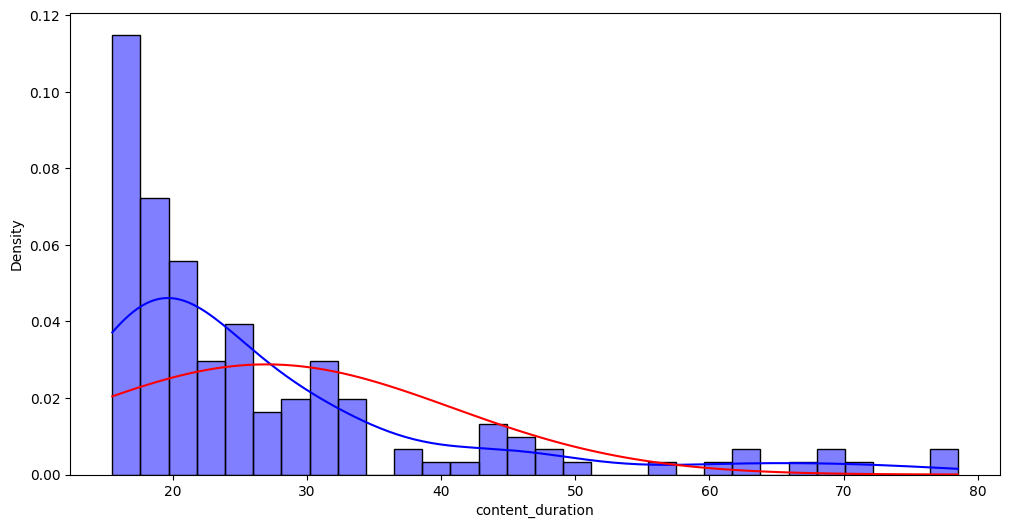

In [39]:
# Plot for content_duration
plt.figure(figsize=(12, 6))

# Plot the histogram with KDE for content_duration
sns.histplot(df_17['content_duration'], kde=True, stat='density', color='blue', bins=30, label='content_duration')

# Plot the normal distribution fit for content_duration
min_content_duration, max_content_duration = df_17['content_duration'].min(), df_17['content_duration'].max()
x_content_duration = np.linspace(min_content_duration, max_content_duration, 100)
pdf_content_duration = stats.norm.pdf(x_content_duration, df_17['content_duration'].mean(), df_17['content_duration'].std())
plt.plot(x_content_duration, pdf_content_duration, 'r-', label='Normal fit for content_duration')


It is right scewed

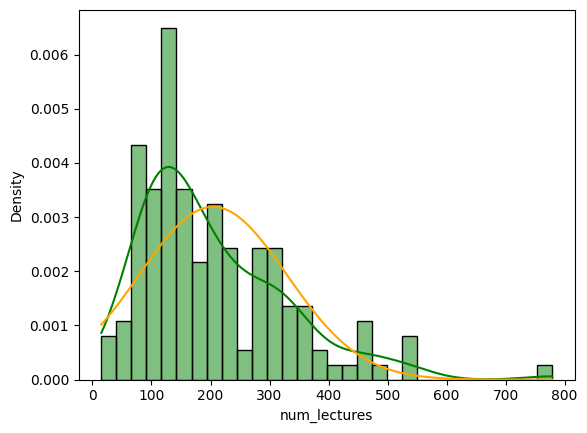

In [40]:
# Plot for num_lectures
sns.histplot(df_17['num_lectures'], kde=True, stat='density', color='green', bins=30, label='num_lectures')

# Plot the normal distribution fit for num_lectures
min_num_lectures, max_num_lectures = df_17['num_lectures'].min(), df_17['num_lectures'].max()
x_num_lectures = np.linspace(min_num_lectures, max_num_lectures, 100)
pdf_num_lectures = stats.norm.pdf(x_num_lectures, df_17['num_lectures'].mean(), df_17['num_lectures'].std())
plt.plot(x_num_lectures, pdf_num_lectures, 'orange', label='Normal fit for num_lectures')

This distribution is not normal

Lets standardize content_duration and lecture number

In [41]:
df_udemy5 = df_udemy4.copy()

Since number of subcribers are right scewed

In [42]:
df_udemy5['content_duration_log'] = np.log1p(df_udemy5['content_duration'])

Replace extreme values in um_lectures beyond a certain threshold with the boundary values.

In [43]:
for col in ['num_lectures']:
    Q1 = df_udemy5[col].quantile(0.25)
    Q3 = df_udemy5[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_udemy5[col] = np.clip(df_udemy5[col], lower_bound, upper_bound)

In [44]:
df_udemy5.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,subject,level,num_lectures,content_duration,publish_year,publish_month,content_duration_log
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,Business Finance,All Levels,51.0,1.5,2017,January,0.916291
1,1057242,Learn How to Set Up an Incubator Hedge Fund - ...,https://www.udemy.com/hedge-fund-startup/,1,200,1406,71,Business Finance,Expert Level,54.0,1.5,2017,January,0.916291
2,1062092,Emini ES Futures - Advanced Non Directional Op...,https://www.udemy.com/emini-es-futures-advance...,1,200,1057,15,Business Finance,All Levels,14.0,1.5,2017,January,0.916291
3,1085580,"RSI, Options Trading & Technical Analysis (3 C...",https://www.udemy.com/charting-rsi-options-sto...,1,200,1047,9,Business Finance,All Levels,46.0,3.5,2017,January,1.504077
4,1076920,Stock Market investment: Practical Accounting,https://www.udemy.com/stock-market-investment-...,1,125,1120,6,Business Finance,Beginner Level,43.0,3.0,2017,January,1.386294


Creating new column revenue

In [45]:
df_udemy5['Revenue'] = df_udemy5['price']*df_udemy5['num_subscribers']

In [46]:
df_udemy5.shape

(3672, 15)

In [47]:
df_udemy5.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,subject,level,num_lectures,content_duration,publish_year,publish_month,content_duration_log,Revenue
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,Business Finance,All Levels,51.0,1.5,2017,January,0.916291,429400
1,1057242,Learn How to Set Up an Incubator Hedge Fund - ...,https://www.udemy.com/hedge-fund-startup/,1,200,1406,71,Business Finance,Expert Level,54.0,1.5,2017,January,0.916291,281200
2,1062092,Emini ES Futures - Advanced Non Directional Op...,https://www.udemy.com/emini-es-futures-advance...,1,200,1057,15,Business Finance,All Levels,14.0,1.5,2017,January,0.916291,211400
3,1085580,"RSI, Options Trading & Technical Analysis (3 C...",https://www.udemy.com/charting-rsi-options-sto...,1,200,1047,9,Business Finance,All Levels,46.0,3.5,2017,January,1.504077,209400
4,1076920,Stock Market investment: Practical Accounting,https://www.udemy.com/stock-market-investment-...,1,125,1120,6,Business Finance,Beginner Level,43.0,3.0,2017,January,1.386294,140000


In [48]:
df_udemy5.describe()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,publish_year,content_duration_log,Revenue
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03
mean,6.758977e+05,0.915577,66.102941,3190.586874,156.371460,34.048339,4.097603,2015.431100,1.327454,2.401076e+05
std,3.430720e+05,0.278058,61.035920,9488.105448,936.178649,25.650556,6.057830,1.184731,0.681123,1.000954e+06
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000e+00
25%,4.077615e+05,1.000000,20.000000,111.750000,4.000000,15.000000,1.000000,2015.000000,0.693147,1.620000e+03
50%,6.876920e+05,1.000000,45.000000,912.000000,18.000000,25.000000,2.000000,2016.000000,1.098612,2.317500e+04
75%,9.608140e+05,1.000000,95.000000,2548.750000,67.000000,46.000000,4.500000,2016.000000,1.704748,1.189025e+05
max,1.282064e+06,1.000000,200.000000,268923.000000,27445.000000,92.500000,78.500000,2017.000000,4.375757,2.431680e+07


Removing courses with zero subscriber

In [49]:

df = df_udemy5[df_udemy5['num_subscribers'] > 0]

In [50]:
df.shape

(3607, 15)

In [51]:
df.describe()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,publish_year,content_duration_log,Revenue
count,3.607000e+03,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3.607000e+03
mean,6.694220e+05,0.914056,66.449958,3248.082894,159.189354,34.436512,4.145005,2015.411699,1.336533,2.444344e+05
std,3.402460e+05,0.280320,61.292052,9563.475977,944.340970,25.695573,6.099960,1.180074,0.681920,1.009411e+06
min,8.324000e+03,0.000000,0.000000,1.000000,0.000000,4.000000,0.133333,2011.000000,0.125163,0.000000e+00
25%,4.053850e+05,1.000000,20.000000,124.000000,5.000000,15.000000,1.500000,2015.000000,0.916291,1.945000e+03
50%,6.781420e+05,1.000000,45.000000,951.000000,19.000000,25.000000,2.500000,2016.000000,1.252763,2.478000e+04
75%,9.508220e+05,1.000000,95.000000,2604.000000,69.000000,46.000000,4.500000,2016.000000,1.704748,1.225500e+05
max,1.277924e+06,1.000000,200.000000,268923.000000,27445.000000,92.500000,78.500000,2017.000000,4.375757,2.431680e+07


In [52]:
# Assuming your dataframe is named df
df = df.sort_values(by='Revenue', ascending=False)



In [53]:
print(df.head())

      course_id                                       course_title  \
2849     625204                         The Web Developer Bootcamp   
1031     764164              The Complete Web Developer Course 2.0   
3215     238934  Pianoforall - Incredible New Way To Learn Pian...   
915      756150  Angular 4 (formerly Angular 2) - The Complete ...   
2120     364426          JavaScript: Understanding the Weird Parts   

                                                    url  is_paid  price  \
2849  https://www.udemy.com/the-web-developer-bootcamp/        1    200   
1031  https://www.udemy.com/the-complete-web-develop...        1    200   
3215  https://www.udemy.com/pianoforall-incredible-n...        1    200   
915   https://www.udemy.com/the-complete-guide-to-an...        1    190   
2120       https://www.udemy.com/understand-javascript/        1    175   

      num_subscribers  num_reviews              subject       level  \
2849           121584        27445      Web Development  

Course revenue distribution

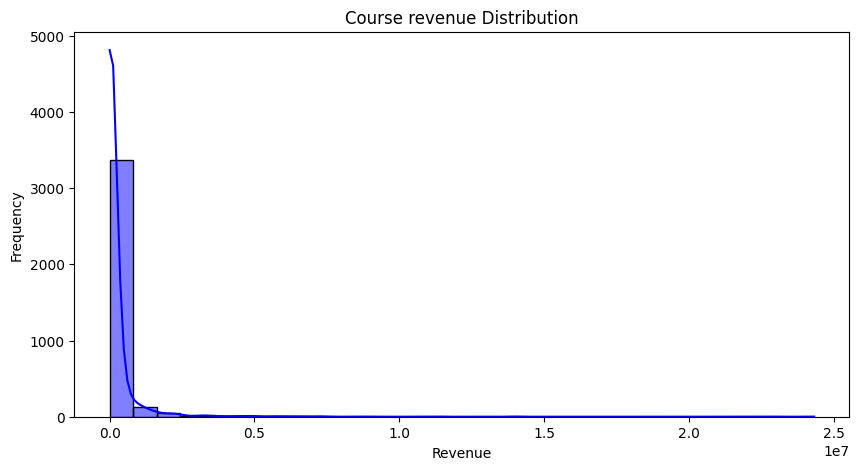

In [54]:

plt.figure(figsize=(10, 5))
sns.histplot(df, x=df.Revenue, bins=30, kde=True, color='blue')  # Adding distribution curves with KDE
plt.title('Course revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.show()

Majority of courses in Udemy generates zero revenue while some generates revenue upto 2.5 Million, which shows imbalance in data but it can happen as most of the courses are free and some courses are $200

Course Revenue Analysis

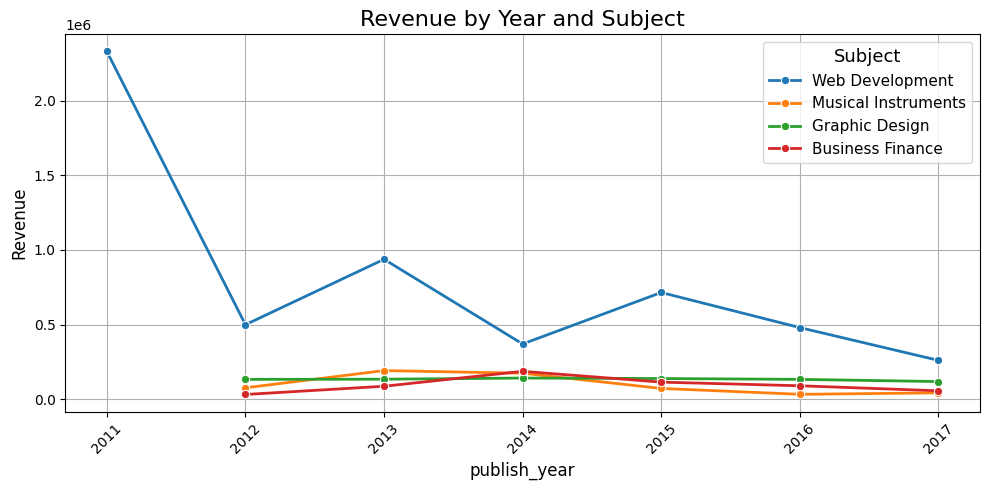

In [56]:


plt.figure(figsize=(10, 5))

# Visualizing revenues by year with lineplot
sns.lineplot(data=df, x='publish_year', y='Revenue', errorbar=None, hue='subject', marker='o', palette='tab10', linewidth=2)

plt.title('Revenue by Year and Subject', fontsize=16)
plt.xlabel('publish_year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.legend(title='Subject', title_fontsize='13', fontsize='11')

plt.show()

Over the years Web Development generated most of the revenues though with time it declined.

Lets find top course and revenue they generated

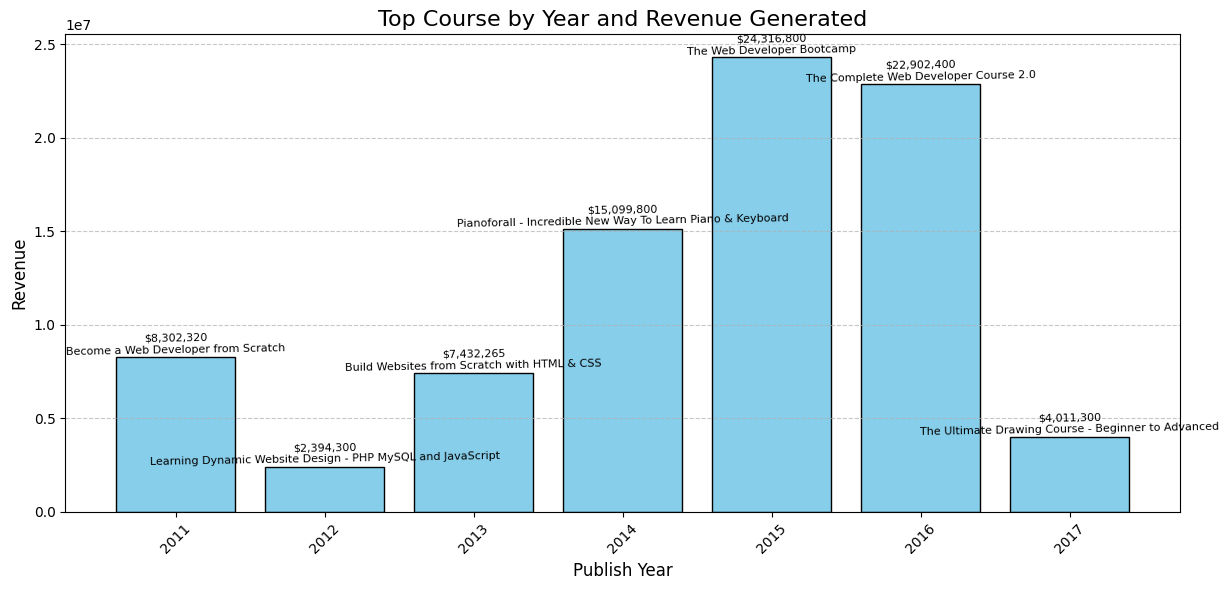

In [63]:
# Get the top course by revenue for each year
top_courses_by_year = df.loc[df.groupby('publish_year')['Revenue'].idxmax()]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_courses_by_year['publish_year'],
    top_courses_by_year['Revenue'],
    color='skyblue',
    edgecolor='black'
)
plt.xticks(top_courses_by_year['publish_year'], rotation=45)
plt.title('Top Course by Year and Revenue Generated', fontsize=16)
plt.xlabel('Publish Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value and course title annotations on each bar
for i, bar in enumerate(bars):
    revenue = bar.get_height()
    course_title = top_courses_by_year.iloc[i]['course_title']
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        revenue,
        f"${revenue:,.0f}\n{course_title}",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=1
    )

plt.show()

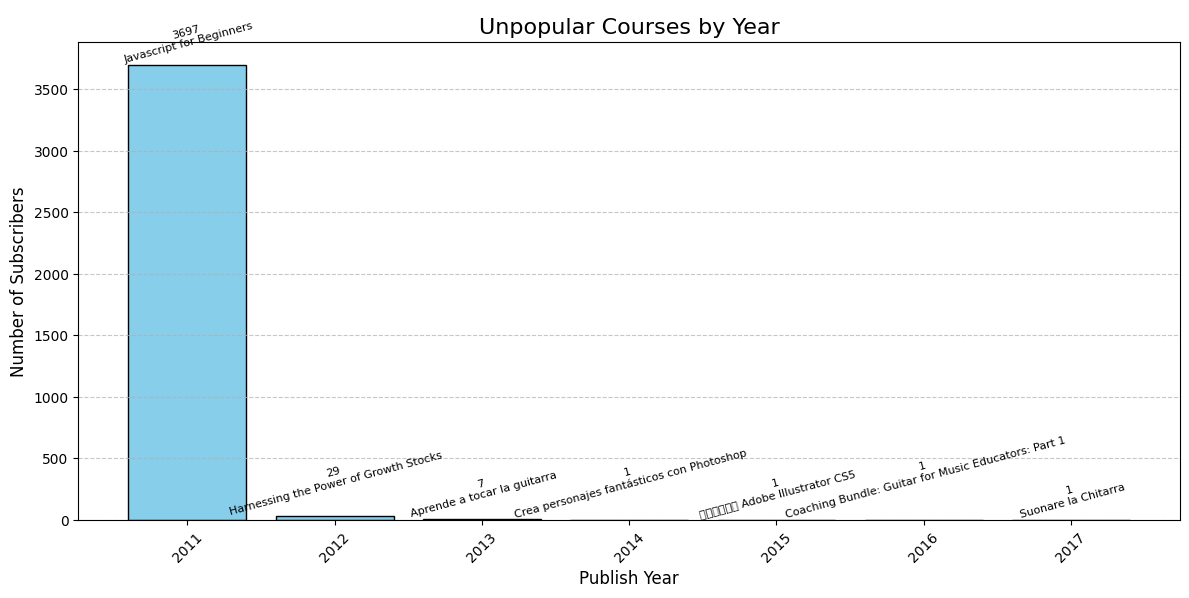

In [73]:
# Get the unpopular course by subscriber number for each year
bottom_courses_by_year = df.loc[df.groupby('publish_year')['num_subscribers'].idxmin()]

# Plotting
plt.figure(figsize=(12, 6))
bars2 = plt.bar(
    bottom_courses_by_year['publish_year'],
    bottom_courses_by_year['num_subscribers'],
    color='skyblue',
    edgecolor='black'
)
plt.xticks(bottom_courses_by_year['publish_year'], rotation=45)
plt.title('Unpopular Courses by Year', fontsize=16)
plt.xlabel('Publish Year', fontsize=12)
plt.ylabel('Number of Subscribers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value and course title annotations on each bar
for i, bar2 in enumerate(bars2):
    num_subscribers = bar2.get_height()
    course_title = bottom_courses_by_year.iloc[i]['course_title']
    plt.text(
        bar2.get_x() + bar2.get_width() / 2,
        num_subscribers,
        f"{num_subscribers}\n{course_title}",
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=15
    )

plt.show()

We get most unpopular courses per year and in year  2014-2017 all the unpopular courses only had 1 subscriber and most of them were courses from music

Lets analysis course review by level

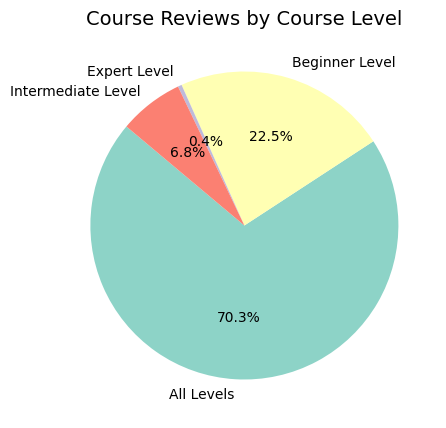

In [87]:
reviews_by_level = df.groupby('level')['num_reviews'].sum()

# Plotting pie chart for course reviews by course level
plt.figure(figsize=(10, 5))

plt.pie(
    reviews_by_level,
    labels=reviews_by_level.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Course Reviews by Course Level', fontsize=14)


plt.show()

<ipython-input-88-abbafc1bd2e0>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_by_duration_category = df.groupby('duration_category')['num_reviews'].sum()


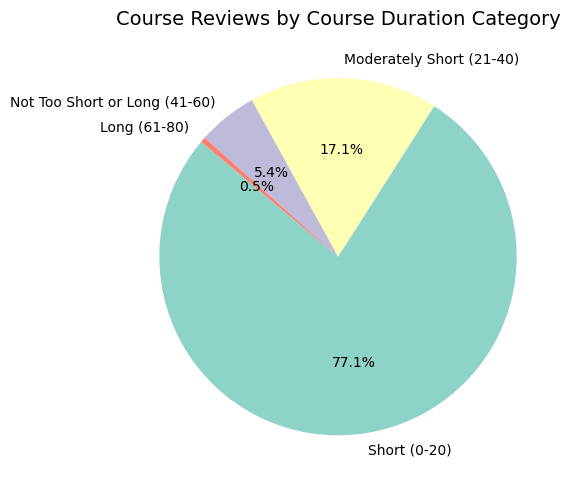

In [88]:

bins = [0, 20, 40, 60, 80]
labels = ['Short (0-20)', 'Moderately Short (21-40)', 'Not Too Short or Long (41-60)',
          'Long (61-80)']

df['duration_category'] = pd.cut(df['content_duration'], bins=bins, labels=labels, right=True)

# Group data by duration category and sum the number of reviews
reviews_by_duration_category = df.groupby('duration_category')['num_reviews'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 5))
plt.pie(
    reviews_by_duration_category,
    labels=reviews_by_duration_category.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Course Reviews by Course Duration Category', fontsize=14)
plt.tight_layout()
plt.show()

So courses with shorter length and course that covers all levels got more reviews but it does not confirm that courses are effective.

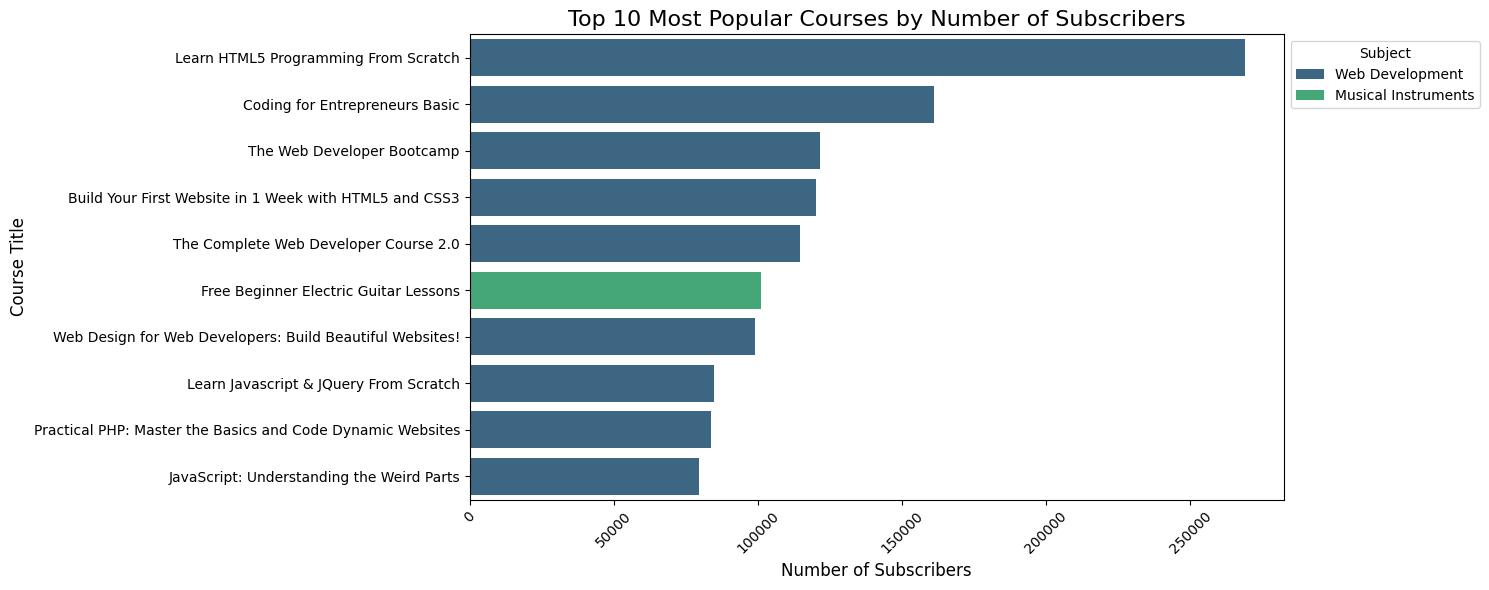

In [89]:
# Top 10 most popular courses by subscribers
Top_ten_courses = df.groupby(['course_title', 'subject'])['num_subscribers'].sum().sort_values(ascending=False).head(10)
df_top_ten = Top_ten_courses.reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(y='course_title', x='num_subscribers', data=df_top_ten, hue='subject', palette='viridis')

plt.title('Top 10 Most Popular Courses by Number of Subscribers', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Subject')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


From here we can see Learn HTML5 programming from scratch is the most poular course

In [95]:

# Select relevant columns
columns_of_interest = ['price', 'content_duration', 'Revenue', 'num_subscribers',
                       'num_reviews', 'num_lectures', 'publish_year']
correlation_data = df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)




Correlation Matrix:
                     price  content_duration   Revenue  num_subscribers  \
price             1.000000          0.292595  0.347287         0.048804   
content_duration  0.292595          1.000000  0.295918         0.159969   
Revenue           0.347287          0.295918  1.000000         0.555111   
num_subscribers   0.048804          0.159969  0.555111         1.000000   
num_reviews       0.113183          0.228058  0.770448         0.650885   
num_lectures      0.347675          0.641221  0.240393         0.121354   
publish_year      0.139011         -0.052973 -0.054118        -0.179667   

                  num_reviews  num_lectures  publish_year  
price                0.113183      0.347675      0.139011  
content_duration     0.228058      0.641221     -0.052973  
Revenue              0.770448      0.240393     -0.054118  
num_subscribers      0.650885      0.121354     -0.179667  
num_reviews          1.000000      0.174207     -0.050989  
num_lectures       

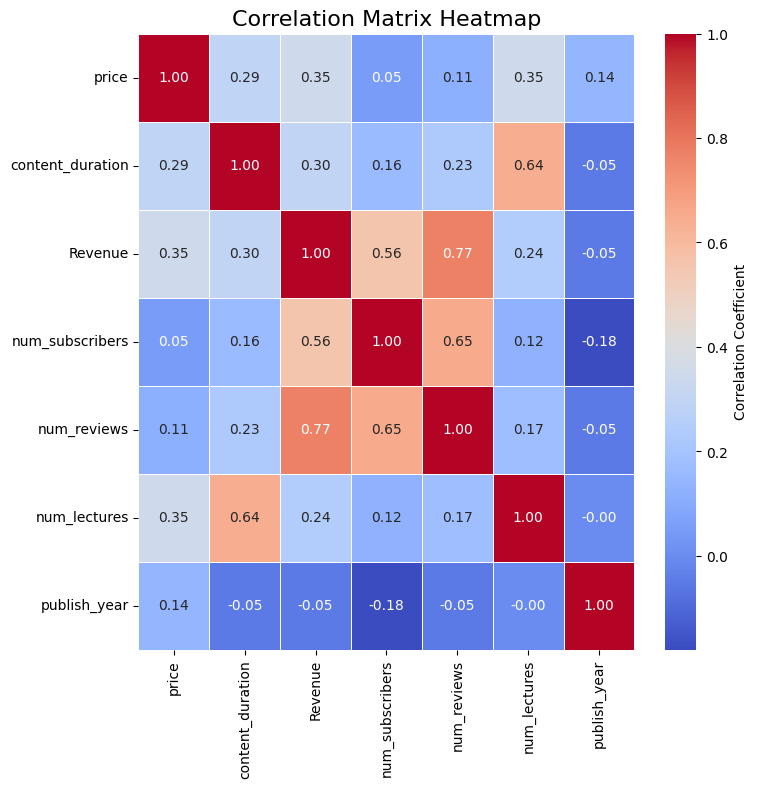

In [96]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()



*   There is a strong positive correlation (0.77) between revenue and the number of reviews, and weakest correlation between num_lectures and revenue meaning that as the number of reviews increases, revenue tends to increase.
*  Content duration has strongest correlation (0.64) with course length which makes sense
*  Number of subscribers have strong correlation with number of reviews (.65) which means as number of reviews increases subscribers increases too.
*   Publish_year has negative correlation with number of subscriber which can mean with year subscriber reduces



